In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("customer_segmentation.csv")

In [3]:
dfcopy=df.copy()

In [4]:
dfcopy.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [5]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [6]:
#check null values
dfcopy.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [7]:
#fill null values
dfcopy["Defaulted"]=dfcopy["Defaulted"].fillna(0)

In [8]:
dfcopy.isnull().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64

In [9]:
#check duplicate values
dfcopy.duplicated().sum()

0

In [10]:
X=dfcopy[["Years Employed","Income"]]
X.head()

,Years Employed,Income
0,6,19
1,26,100
2,10,57
3,4,19
4,31,253


In [11]:
X.shape

(850, 2)

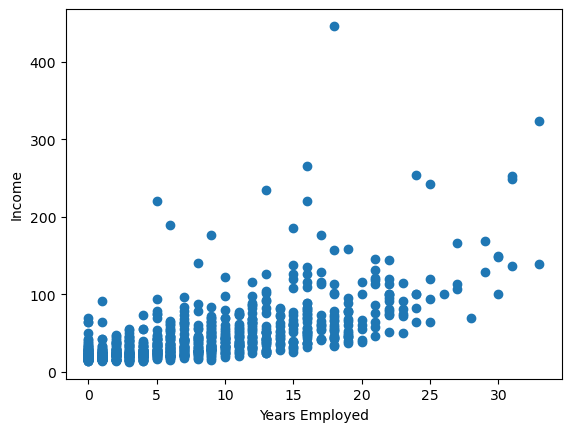

In [12]:
plt.scatter(dfcopy['Years Employed'],dfcopy['Income'])
plt.xlabel("Years Employed")
plt.ylabel("Income")
plt.show()

In [13]:
from sklearn.cluster import KMeans

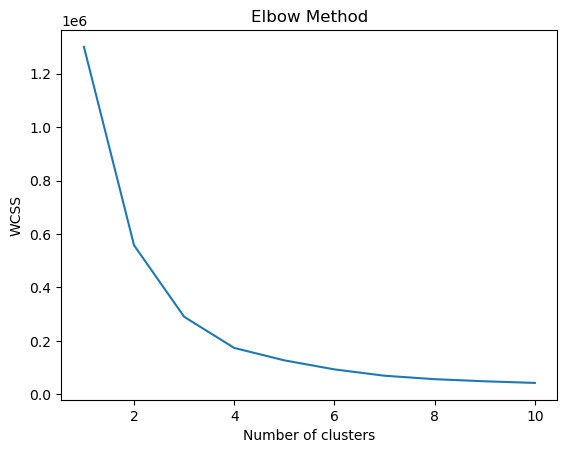

In [14]:
#Elbow Method to find value of k
wcss=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(X)

C:\Users\Aqsa Kanwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [16]:
predictions=kmeans.fit_predict(X)
predictions

C:\Users\Aqsa Kanwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 3, 0, 1, 2, 0, 0, 0, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 3, 3, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 3, 3, 1, 3, 1,
       0, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [17]:
dfcopy['Cluster']=predictions

In [18]:
dfcopy.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8,3
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2,2


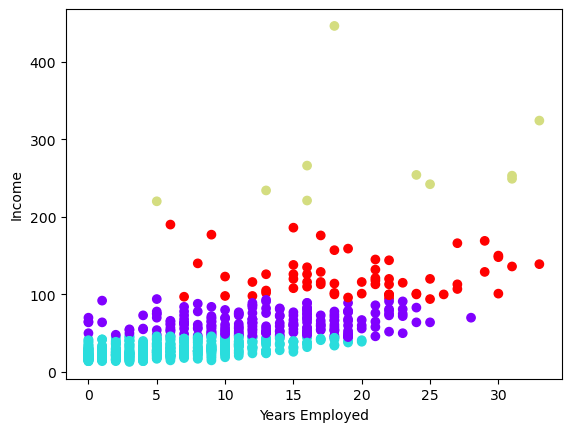

In [19]:
plt.scatter(dfcopy['Years Employed'],dfcopy['Income'],c=dfcopy['Cluster'],cmap='rainbow')
plt.xlabel("Years Employed")
plt.ylabel("Income")
plt.show()

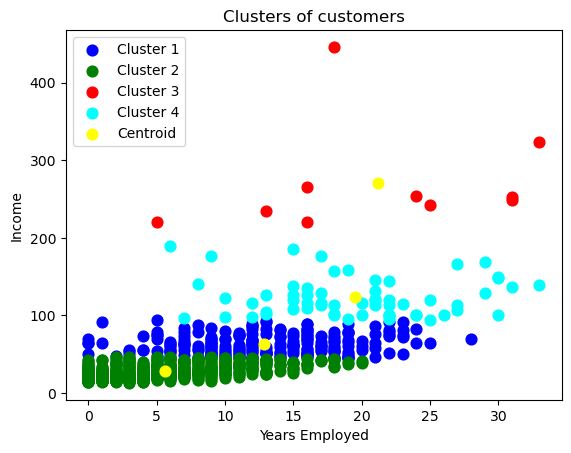

In [20]:
plt.scatter(X.loc[predictions == 0, "Years Employed"], X.loc[predictions == 0, "Income"], s=60, c='blue', label='Cluster 1')
plt.scatter(X.loc[predictions == 1, "Years Employed"], X.loc[predictions == 1, "Income"], s=60, c='green', label='Cluster 2')
plt.scatter(X.loc[predictions == 2, "Years Employed"], X.loc[predictions == 2, "Income"], s=60, c='red', label='Cluster 3')
plt.scatter(X.loc[predictions == 3, "Years Employed"], X.loc[predictions == 3, "Income"], s=60, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='yellow', label='Centroid')
plt.title('Clusters of customers')
plt.xlabel('Years Employed')
plt.ylabel('Income')
plt.legend()
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss=StandardScaler()
x=ss.fit_transform(X)

In [23]:
x.shape

(850, 2)

In [24]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(x)

C:\Users\Aqsa Kanwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [25]:
predictions1=kmeans.fit_predict(x)
predictions1

C:\Users\Aqsa Kanwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 3, 0, 1, 2, 3, 1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 3, 1, 3, 1, 2,
       1, 0, 1, 1, 1, 0, 3, 0, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 1, 0,
       3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 3, 0, 0, 1, 3, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 3, 3, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 3, 1, 0, 1, 0, 1,
       0, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 1, 1, 3,
       2, 1, 3, 1, 1, 1, 1, 0, 0, 2, 3, 1, 0, 0, 0, 3, 1, 1, 0, 1, 0, 0,
       1, 3, 0, 1, 1, 1, 3, 1, 1, 0, 0, 0, 0, 1, 3, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 3, 0, 0, 0, 1, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       3, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1,
       0, 1, 3, 3, 1, 0, 1, 0, 1, 1, 1, 0, 1, 3, 0,

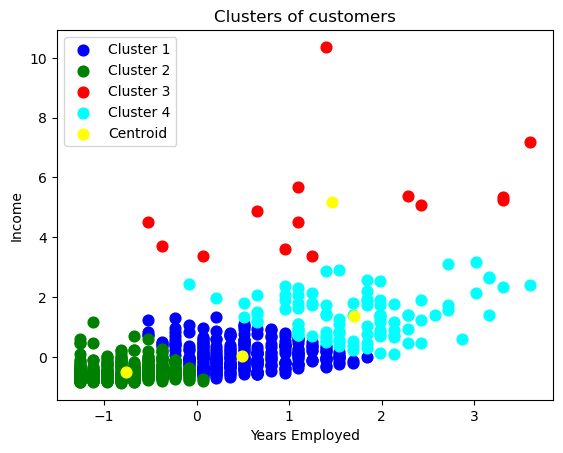

In [26]:
plt.scatter(x[predictions1 == 0, 0], x[predictions1 == 0, 1], s=60, c='blue', label='Cluster 1')
plt.scatter(x[predictions1 == 1, 0], x[predictions1 == 1, 1], s=60, c='green', label='Cluster 2')
plt.scatter(x[predictions1 == 2, 0], x[predictions1 == 2, 1], s=60, c='red', label='Cluster 3')
plt.scatter(x[predictions1 == 3, 0], x[predictions1 == 3, 1], s=60, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='yellow', label='Centroid')
plt.title('Clusters of customers')
plt.xlabel('Years Employed')
plt.ylabel('Income')
plt.legend()
plt.show()